# Heart Failure Prediction Assignment

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df=pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

### 2. Data Visualization
- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

## Submission Instructions:
- Submit your notebook file to github with the completed analysis.
- Ensure that the notebook is well-documented with explanations for each step.
- Include visualizations and comments on the results of each model.
- Submit github link only

# Data Exploration (EDA)

- **Task 1**

In [11]:
#Load the dataset using pandas
import pandas as pd
df = pd.read_csv('heart failure.csv')

#Display the first few rows
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- **Task 2**

In [13]:
#Check for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

- Comment: There is no missing values

- **Task 3**

In [16]:
#Generate summary statistics for the numerical columns
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


- **Task 4**

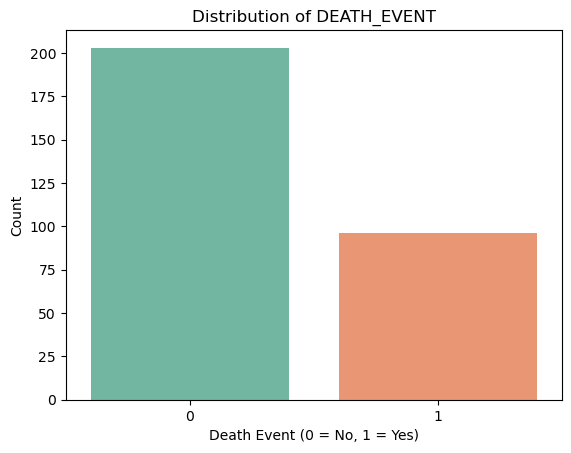

In [18]:
#Visualize the distribution of the target variable (DEATH_EVENT)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of DEATH_EVENT
sns.countplot(data=df, x='DEATH_EVENT', hue='DEATH_EVENT', palette='Set2', legend=False)
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

- **Task 5**

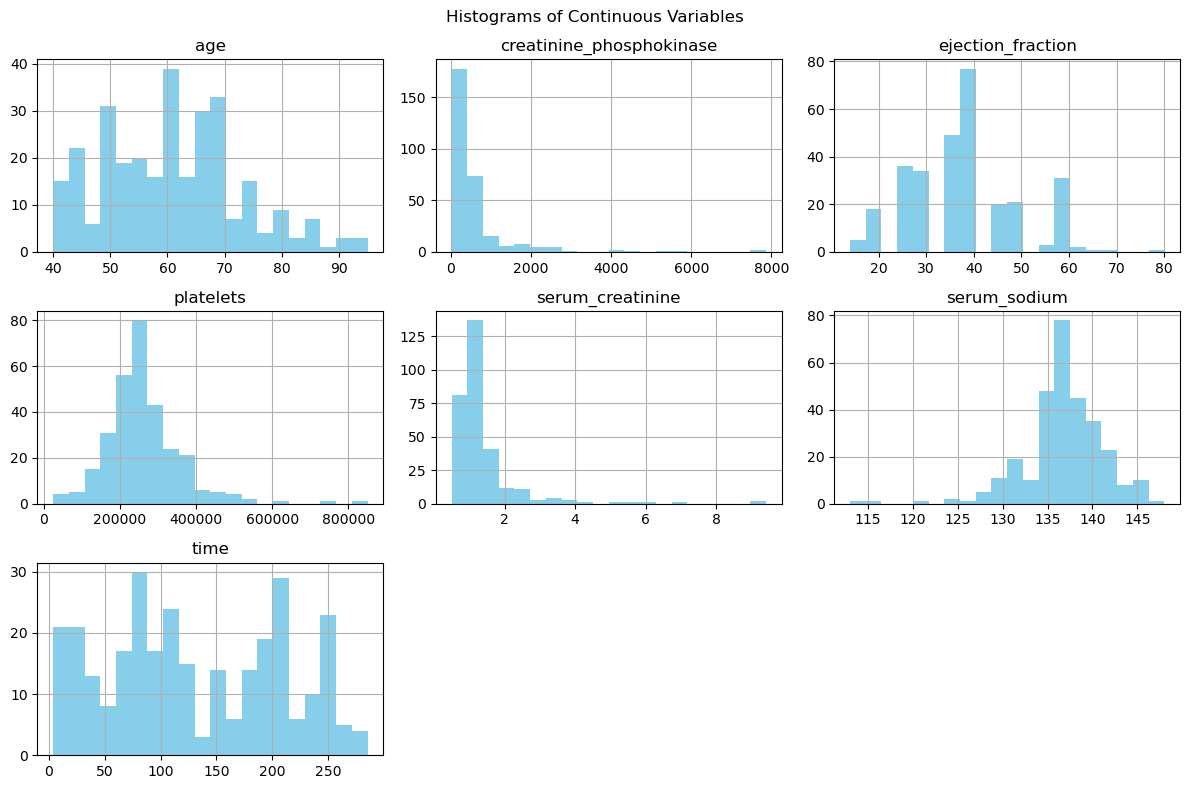

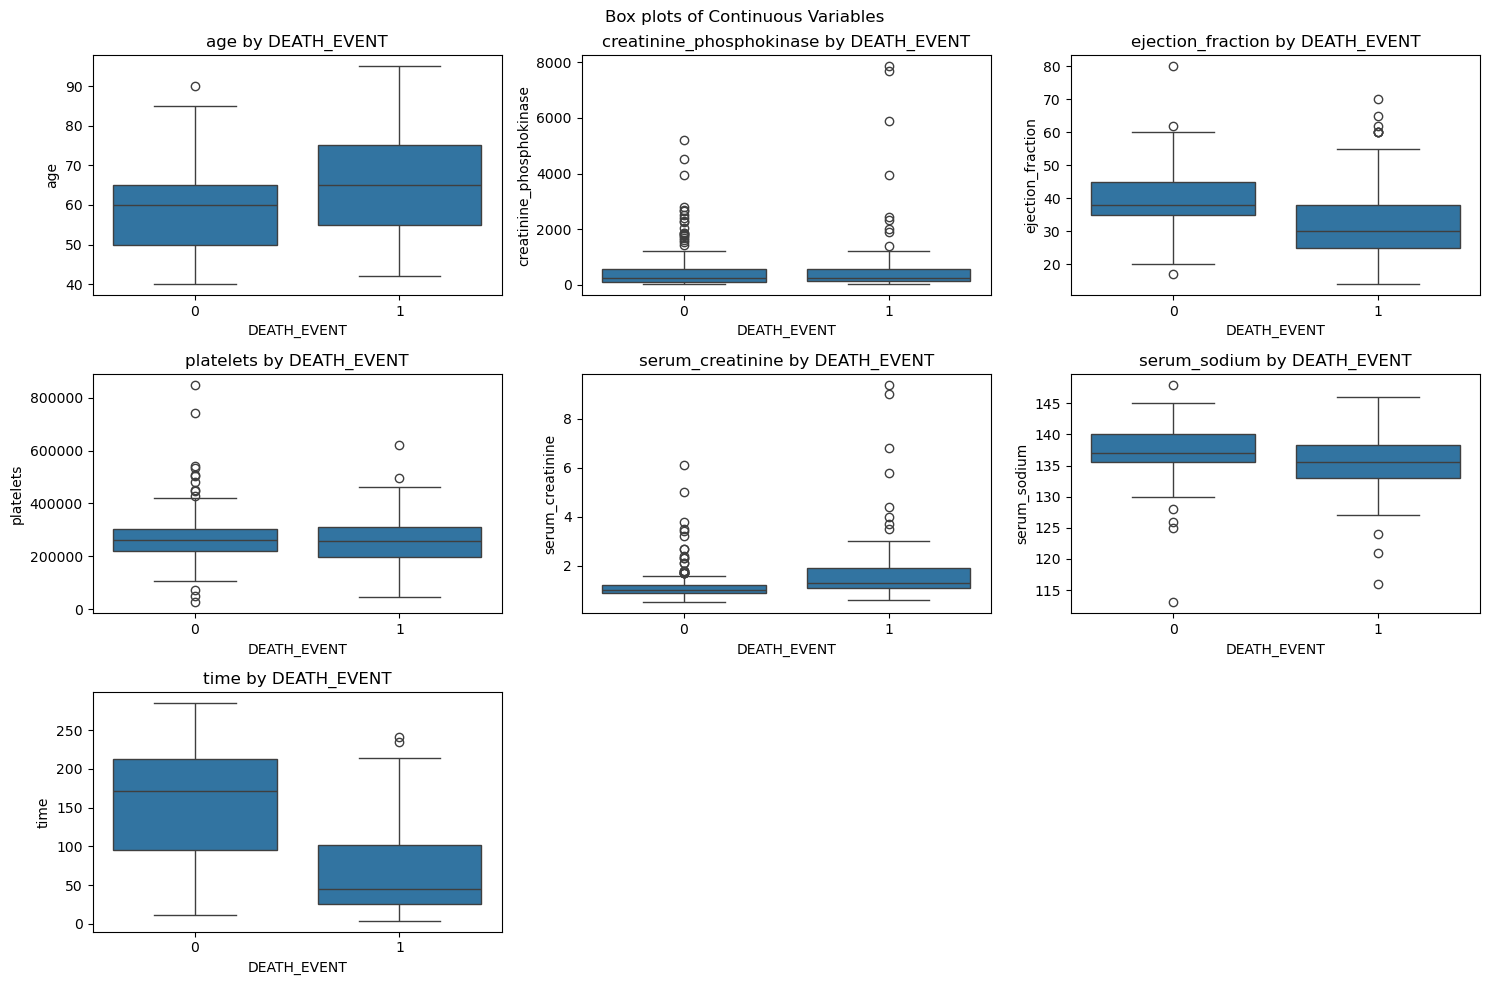

In [20]:
#Plot histograms or box plots for continuous variables like age, creatinine_phosphokinase, ejection_fraction, serum_creatinine, etc
# List of continuous features
cont_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Histograms
df[cont_features].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle('Histograms of Continuous Variables')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(cont_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='DEATH_EVENT', y=col)
    plt.suptitle('Box plots of Continuous Variables')
    plt.title(f'{col} by DEATH_EVENT')
plt.tight_layout()
plt.show()

# Data Visualization

- **Task 6**

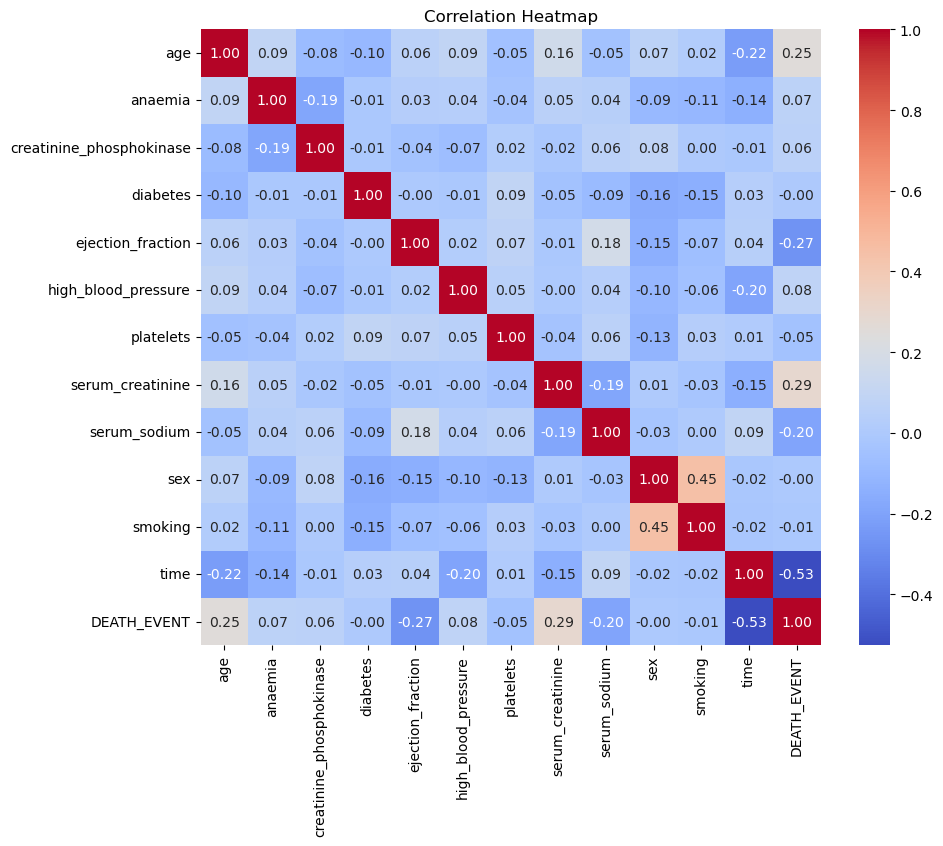

In [23]:
#Create a correlation matrix heatmap to understand the relationships between the features
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- **Task 7**

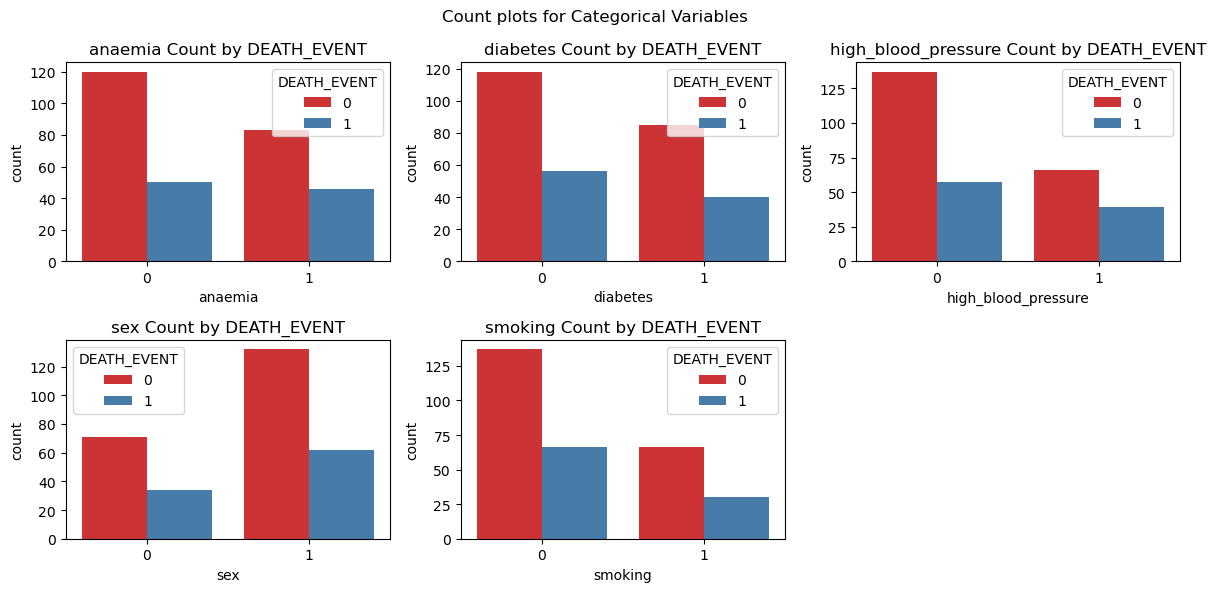

In [25]:
#Create count plots or bar charts for categorical variables like anaemia, diabetes, high_blood_pressure, sex, and smoking
cat_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='DEATH_EVENT', palette='Set1')
    plt.suptitle('Count plots for Categorical Variables')
    plt.title(f'{col} Count by DEATH_EVENT')
plt.tight_layout()
plt.show()

- **Task 8**

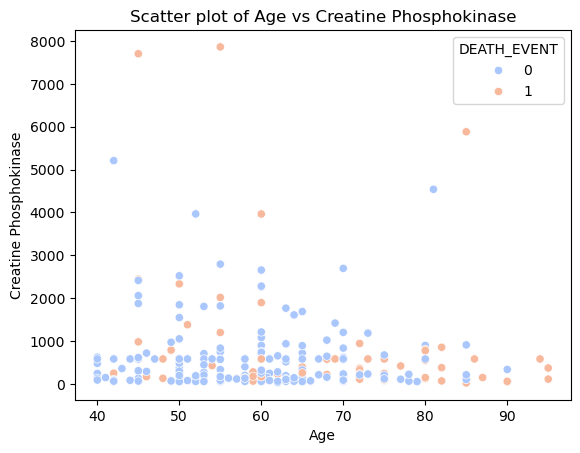

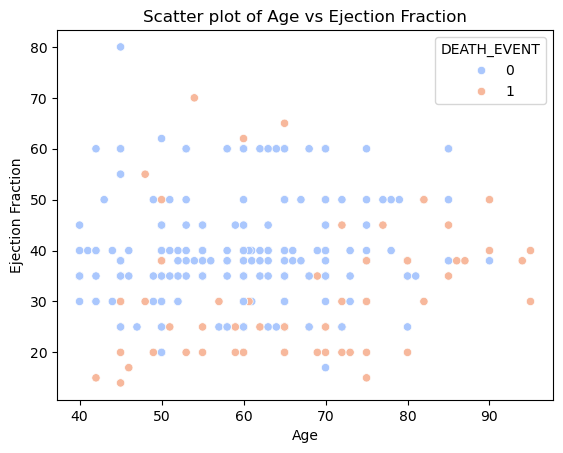

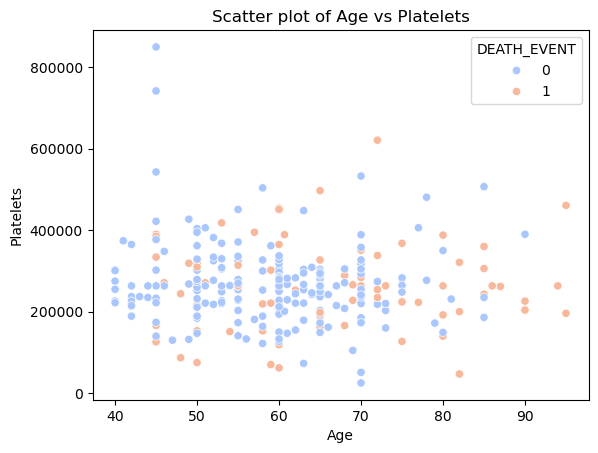

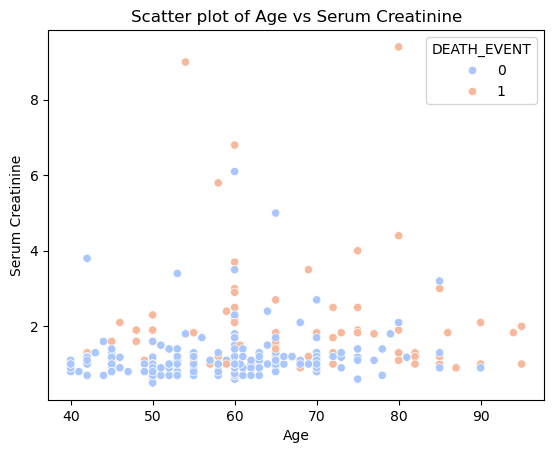

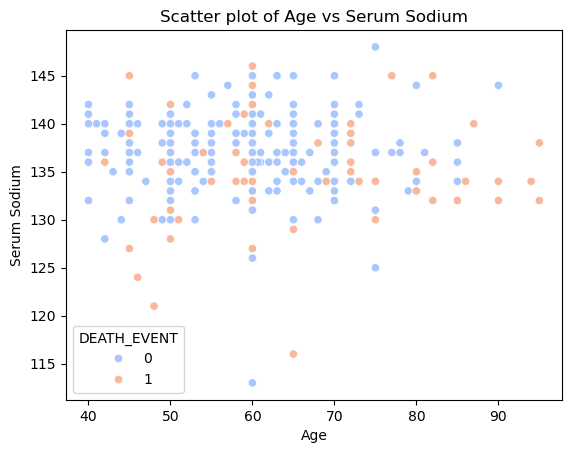

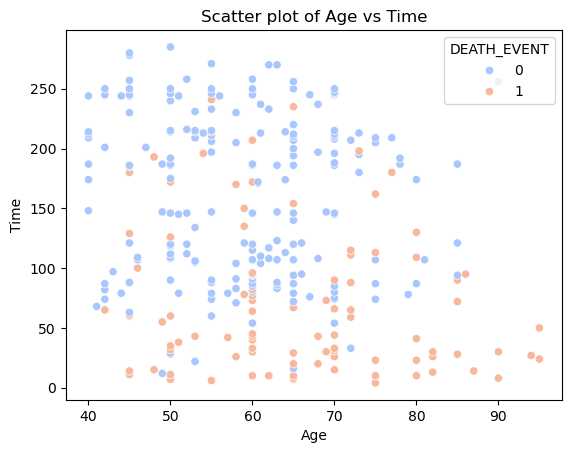

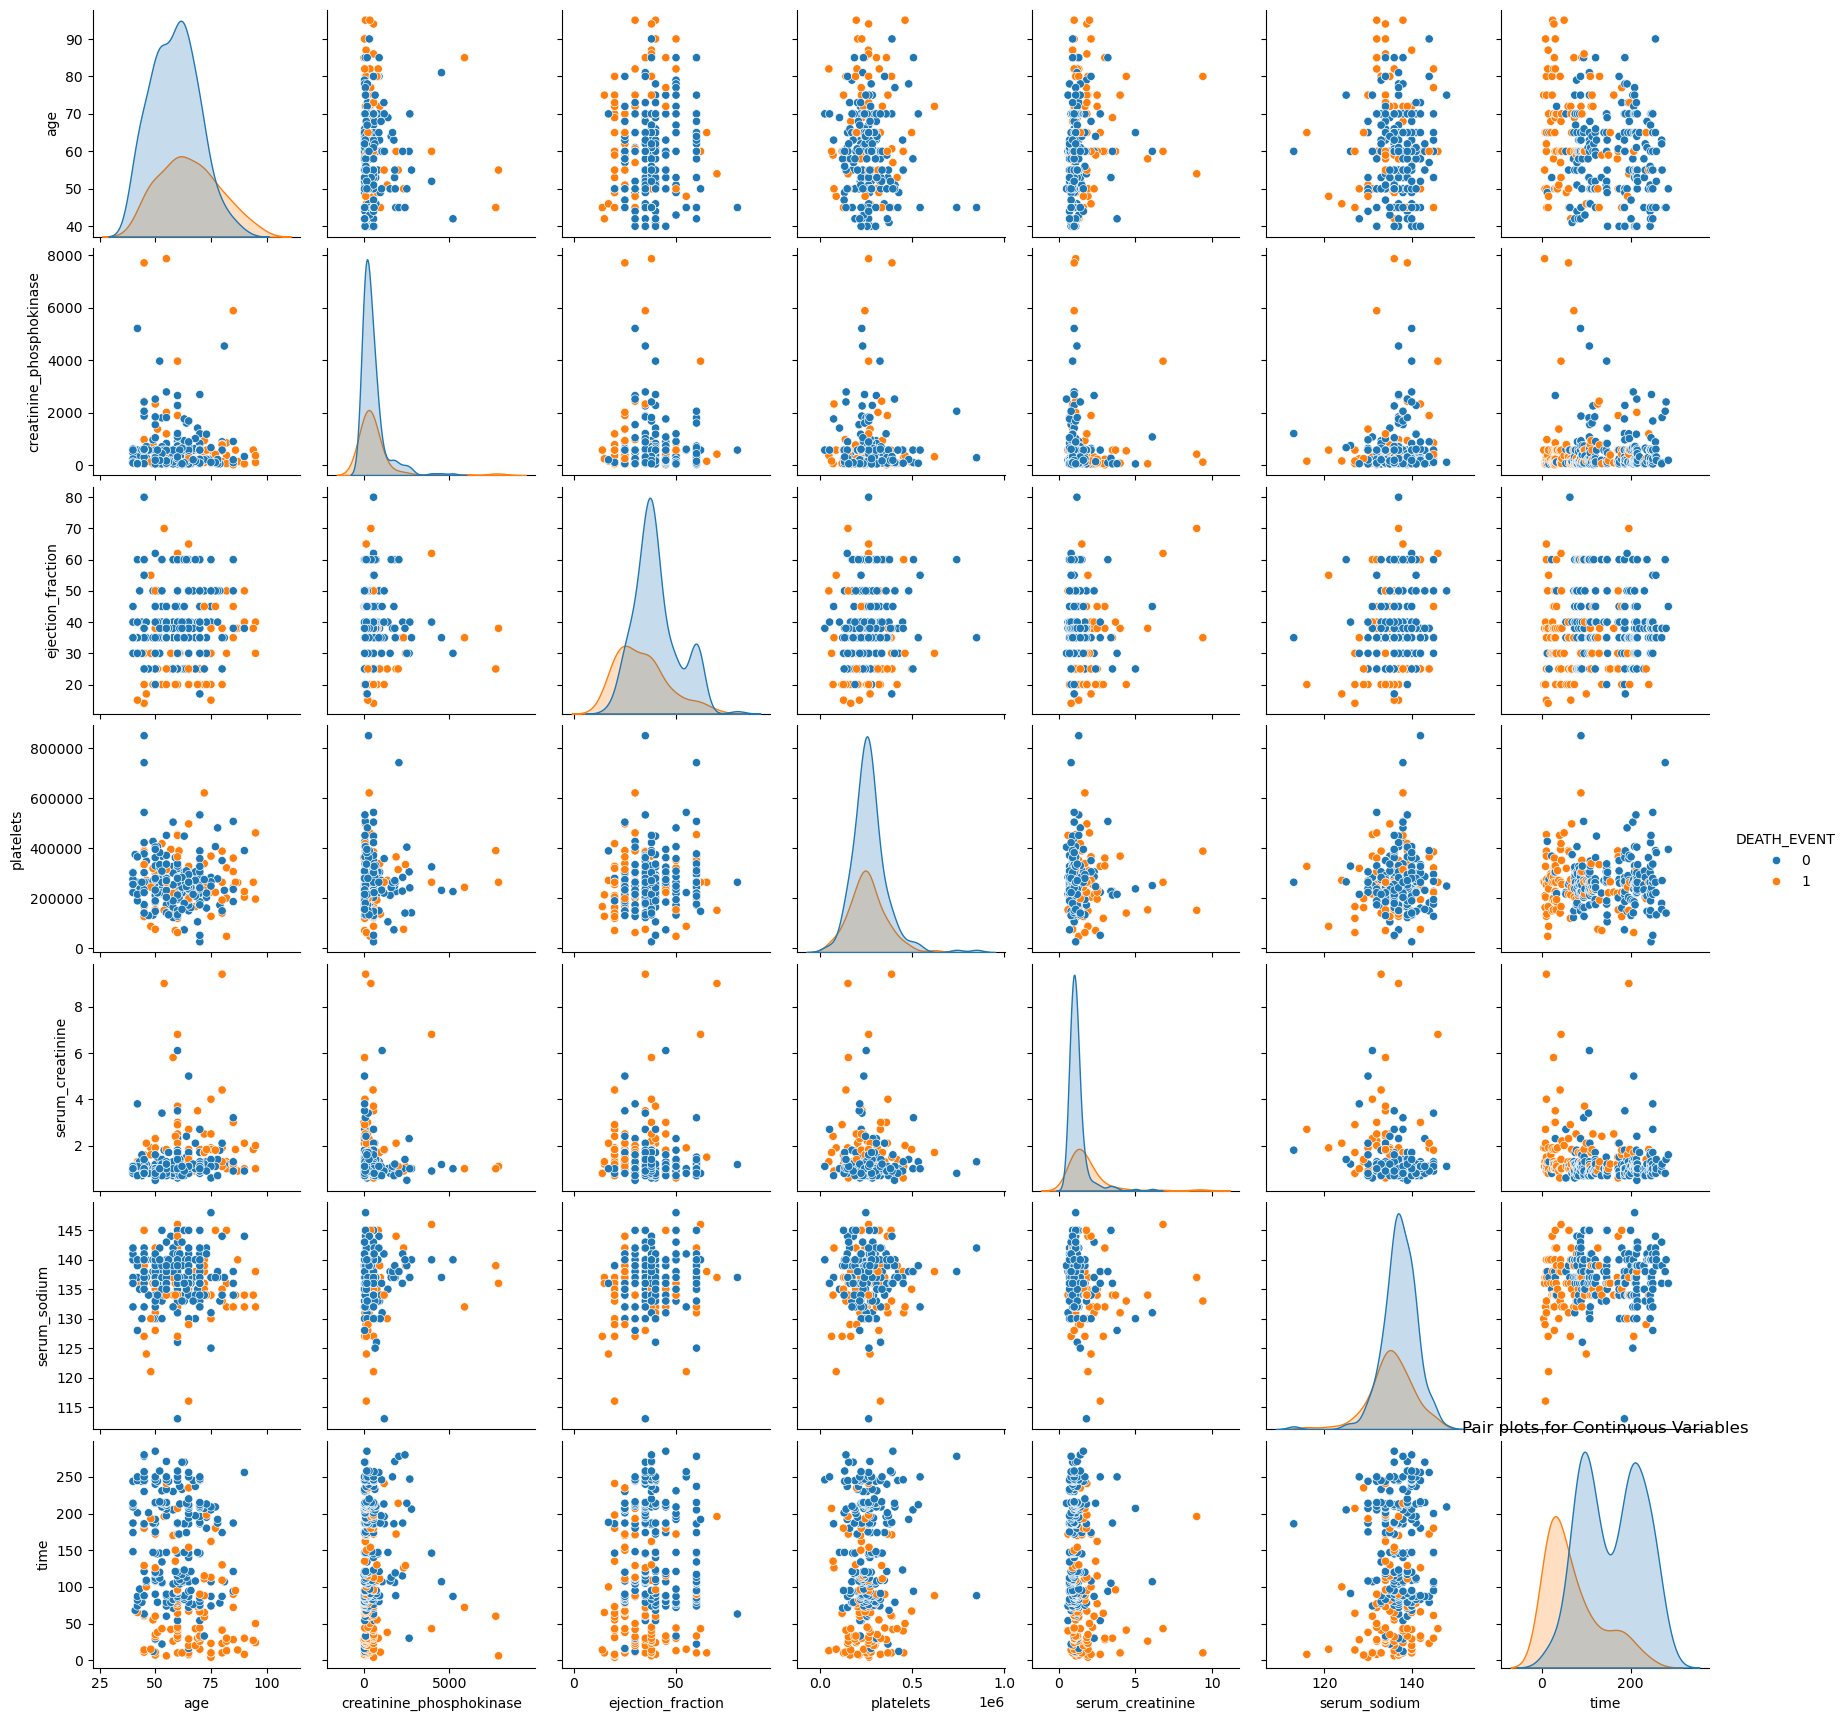

In [27]:
#Create scatter plots or pair plots for continuous variables like age vs ejection_fraction, serum_creatinine, etc., colored by DEATH_EVENT

#scatter plots
sns.scatterplot(data=df, x='age', y='creatinine_phosphokinase', hue='DEATH_EVENT', palette='coolwarm')
plt.title("Scatter plot of Age vs Creatine Phosphokinase")
plt.xlabel('Age')
plt.ylabel('Creatine Phosphokinase')
plt.show()

sns.scatterplot(data=df, x='age', y='ejection_fraction', hue='DEATH_EVENT', palette='coolwarm')
plt.title("Scatter plot of Age vs Ejection Fraction")
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.show()

sns.scatterplot(data=df, x='age', y='platelets', hue='DEATH_EVENT', palette='coolwarm')
plt.title("Scatter plot of Age vs Platelets")
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.show()

sns.scatterplot(data=df, x='age', y='serum_creatinine', hue='DEATH_EVENT', palette='coolwarm')
plt.title("Scatter plot of Age vs Serum Creatinine")
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.show()

sns.scatterplot(data=df, x='age', y='serum_sodium', hue='DEATH_EVENT', palette='coolwarm')
plt.title("Scatter plot of Age vs Serum Sodium")
plt.xlabel('Age')
plt.ylabel('Serum Sodium')
plt.show()

sns.scatterplot(data=df, x='age', y='time', hue='DEATH_EVENT', palette='coolwarm')
plt.title("Scatter plot of Age vs Time")
plt.xlabel('Age')
plt.ylabel('Time')
plt.show()

#pair plots
sns.pairplot(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']], hue='DEATH_EVENT')
plt.title("Pair plots for Continuous Variables")
plt.show()

- **Task 9**

In [29]:
#Split the dataset into features (X) and the target variable (y = DEATH_EVENT)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

- **Task 10**

In [31]:
#Perform train-test splitting (70% training, 30% testing) using train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

- **Task 11**

In [33]:
#Standardize the continuous features using StandardScaler
scaler = StandardScaler()
cont_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

X_train[cont_features] = scaler.fit_transform(X_train[cont_features])
X_test[cont_features] = scaler.transform(X_test[cont_features])

# Model Training and Evaluation

- **Task 12**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [37]:
#Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression:")
evaluate_model(log_model, X_test, y_test)

Logistic Regression:
Accuracy: 0.83
Precision: 0.79
Recall: 0.66
F1 Score: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        61
           1       0.79      0.66      0.72        29

    accuracy                           0.83        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90



- **Task 13**

In [39]:
#Train a K-Nearest Neighbors (KNN) model and evaluate its performance
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("KNN Model:")
evaluate_model(knn_model, X_test, y_test)

KNN Model:
Accuracy: 0.76
Precision: 0.67
Recall: 0.48
F1 Score: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        61
           1       0.67      0.48      0.56        29

    accuracy                           0.76        90
   macro avg       0.72      0.68      0.70        90
weighted avg       0.75      0.76      0.74        90



- **Task 14**

In [41]:
#Train a Decision Tree Classifier and compare its performance with other models
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
print("Decision Tree:")
evaluate_model(tree_model, X_test, y_test)

Decision Tree:
Accuracy: 0.79
Precision: 0.69
Recall: 0.62
F1 Score: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        61
           1       0.69      0.62      0.65        29

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.79        90



# Cross Validation

- **Task 15**

In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [45]:
#Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance
kfold_scores = cross_val_score(log_model, X, y, cv=5, scoring='f1')
print("Logistic Regression 5-Fold F1 Scores:", kfold_scores)
print("Mean F1 Score:", kfold_scores.mean())

Logistic Regression 5-Fold F1 Scores: [0.58064516 0.85714286 0.8125     0.73333333 0.        ]
Mean F1 Score: 0.5967242703533027


C:\Users\stama\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\stama\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

- **Task 16**

In [47]:
#Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation
# Stratified K-Fold
skf = StratifiedKFold(n_splits=5)
strat_scores = cross_val_score(log_model, X, y, cv=skf, scoring='f1')
print("Stratified K-Fold F1 Scores:", strat_scores)

C:\Users\stama\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\stama\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Stratified K-Fold F1 Scores: [0.58064516 0.85714286 0.8125     0.73333333 0.        ]


C:\Users\stama\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Improvement

- **Task 17**

In [50]:
#Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models
from sklearn.model_selection import GridSearchCV

# Grid Search for KNN
param_grid_knn = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
print("Best KNN Params:", grid_knn.best_params_)

# Grid Search for Decision Tree
param_grid_tree = {'max_depth': range(1, 10)}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='f1')
grid_tree.fit(X_train, y_train)
print("Best Decision Tree Params:", grid_tree.best_params_)

Best KNN Params: {'n_neighbors': 1}
Best Decision Tree Params: {'max_depth': 1}


- **Task 18**

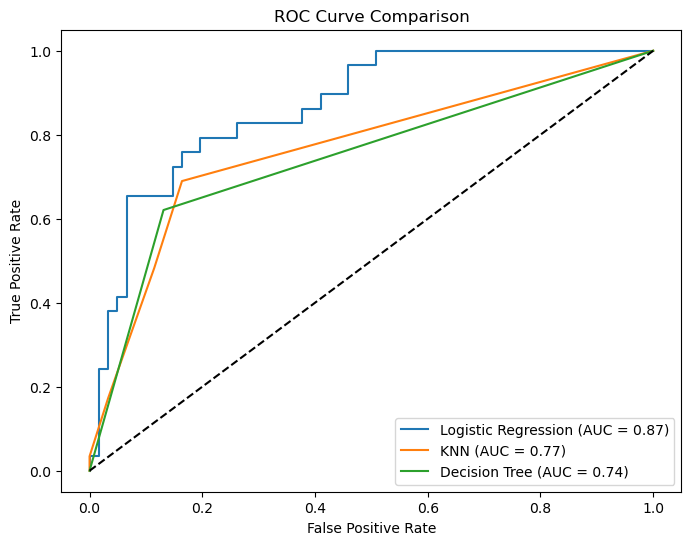

In [52]:
#Plot the ROC curves and calculate the AUC for all models to compare their performance visually
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_proba_log = log_model.predict_proba(X_test)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Plot ROC
plt.figure(figsize=(8, 6))
for y_proba, label in zip(
    [y_proba_log, y_proba_knn, y_proba_tree],
    ['Logistic Regression', 'KNN', 'Decision Tree']
):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

- **Task 19**

##### Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event #####

Among the models tested, Logistic Regression was simple and effective. The model had consistent performance across folds. K-Nearest Neighbors (KNN) performance was sensitive due to the number of neighbors and the performance was slightly worse without tuning. On the other hand, Decision Tree model performed well but it was more prone to overfitting.
After doing ROC-AUC analysis, Logistic Regression had the highest AUC, which denotes that it generalizes better to unseen data. On the other hand, Decision Tree had comparable recall but lower precision. From these results, it is clearly visible that Logistic Regression is the best performing model. Because, it had the best balance of precision, recall and interpretability.

Also Age, serum_creatinine, ejection_fraction and time were among the most important features for predicting the DEATH_EVENT. Where high creatinine and low ejection fraction correlates strongly with DEATH_EVENT.

- **Task 20** 

##### Suggest potential improvements or next steps for the analysis #####

These can be the potential improvements or next steps for the analysis:
1. Using ensemble models such as Random Forest or Gradient Boosting to get better performance.
2. Exploring feature engineering.
3. Using SMOTE to handle class imbalance.